In [1]:
import pandas as pd

df = pd.read_csv('Enron.csv')
print(df.head())

                                      subject  \
0                   hpl nom for may 25 , 2001   
1            re : nom / actual vols for 24 th   
2  enron actuals for march 30 - april 1 , 201   
3                   hpl nom for may 30 , 2001   
4                   hpl nom for june 1 , 2001   

                                                body  label  
0  ( see attached file : hplno 525 . xls )\r\n- h...      0  
1  - - - - - - - - - - - - - - - - - - - - - - fo...      0  
2  estimated actuals\r\nmarch 30 , 2001\r\nno flo...      0  
3  ( see attached file : hplno 530 . xls )\r\n- h...      0  
4  ( see attached file : hplno 601 . xls )\r\n- h...      0  


In [2]:
print(df.isnull().sum())

subject    198
body         0
label        0
dtype: int64


In [3]:
df = df.dropna()

In [4]:
print(df.isnull().sum())

subject    0
body       0
label      0
dtype: int64


In [5]:
print(df['label'].value_counts())

0    15791
1    13778
Name: label, dtype: int64


In [6]:
df['body'] = df['body'].str.lower().str.strip()

In [7]:
from sklearn.model_selection import train_test_split

X = df['body']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [10]:
y_pred = model.predict(X_test_vec)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9876564085221509

Confusion Matrix:
 [[3083   62]
 [  11 2758]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3145
           1       0.98      1.00      0.99      2769

    accuracy                           0.99      5914
   macro avg       0.99      0.99      0.99      5914
weighted avg       0.99      0.99      0.99      5914



In [11]:
import joblib

joblib.dump(model, 'Enrol_detector.pkl')
joblib.dump(vectorizer, 'Enrol_vectorizer.pkl')

['Enrol_vectorizer.pkl']

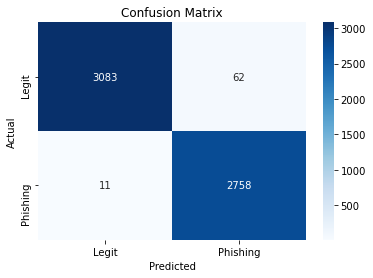

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()